In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The Dataset Having the Numeric Data and Categorical Data.

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The Data Having the no null values our data set is all set to go for analysis.

In [5]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [6]:
numeric_data

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [7]:
categorical_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [8]:
for col in categorical_data:
    print('\n%s column: '%col)
    print(df[col].value_counts())


customerID column: 
3331-HQDTW    1
2195-VVRJF    1
9356-AXGMP    1
6358-LYNGM    1
1342-JPNKI    1
             ..
2386-OWURY    1
5296-BFCYD    1
9779-DPNEJ    1
7615-ESMYF    1
9261-WDCAF    1
Name: customerID, Length: 7043, dtype: int64

gender column: 
Male      3555
Female    3488
Name: gender, dtype: int64

Partner column: 
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents column: 
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService column: 
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines column: 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService column: 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity column: 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup column: 
No                     3088
Yes     

As per data we can remove customerID

In [9]:
categorical_data=categorical_data.drop(['customerID','TotalCharges'],axis=1)

In [10]:
categorical_data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [11]:
for col in numeric_data:
    print('\n%s column: '%col)
    print(df[col].value_counts())


SeniorCitizen column: 
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

tenure column: 
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

MonthlyCharges column: 
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64


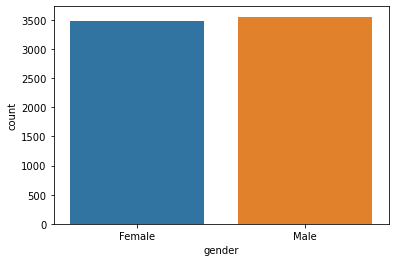

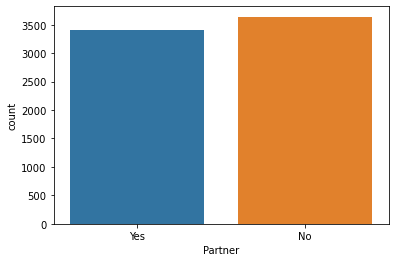

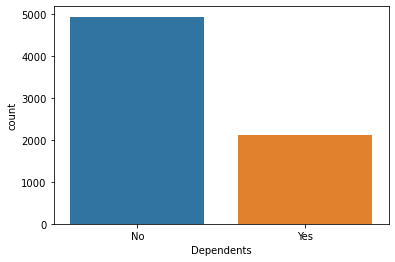

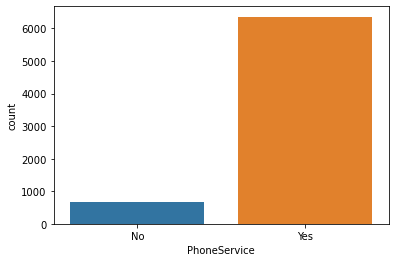

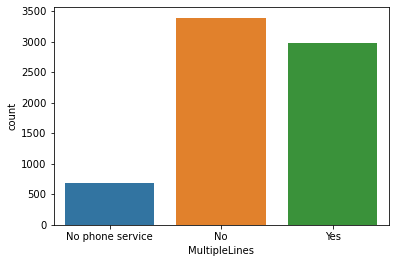

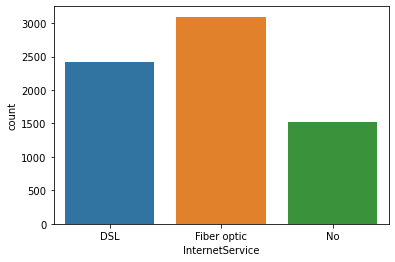

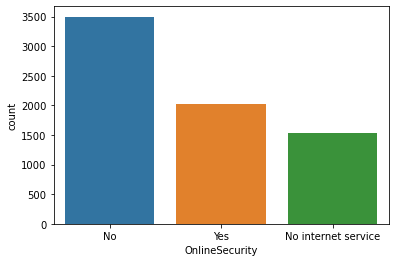

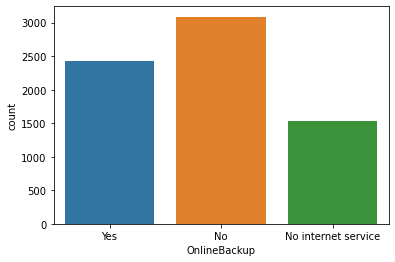

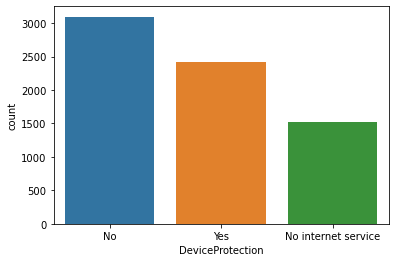

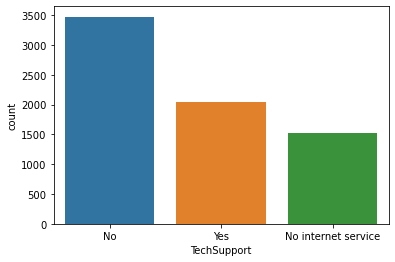

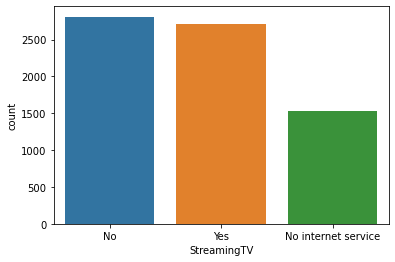

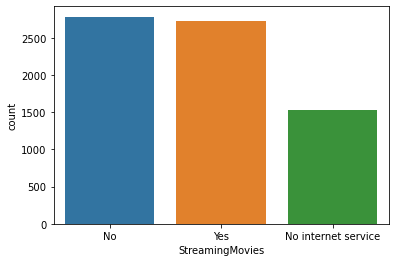

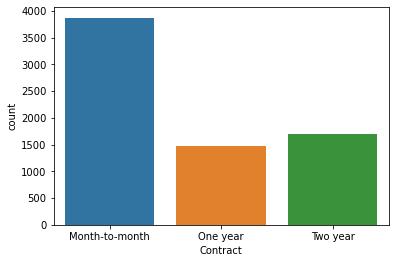

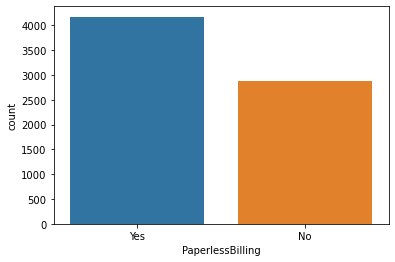

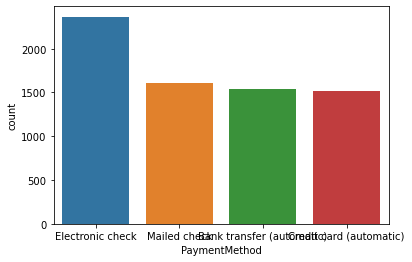

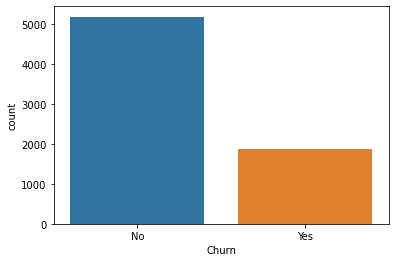

In [12]:
for i in categorical_data.columns:
    plt.figure()
    sns.countplot(x=categorical_data[i],data=categorical_data)

Observation:
    
1.As per count and graph Male are more.

2.partner value no is more.

3.Dependents are no.

4.phone service is there.

5.Multiple lines are not there.

6.Fiber Optic Service is more.

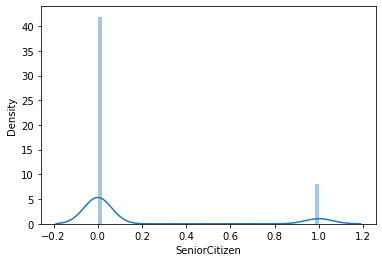

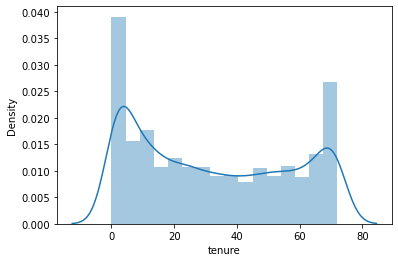

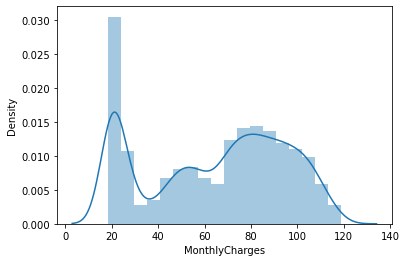

In [13]:
for i in numeric_data.columns:
    plt.figure()
    sns.distplot(numeric_data[i])

In [14]:
df1 = pd.concat([numeric_data,categorical_data], axis=1)
df1

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0,34,56.95,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,0,2,53.85,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0,45,42.30,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,0,2,70.70,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,0,72,103.20,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,0,11,29.60,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,1,4,74.40,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


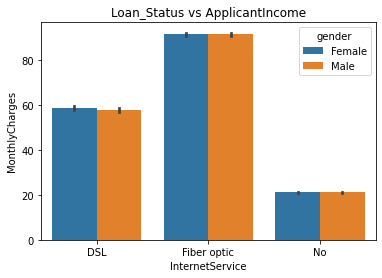

In [15]:
sns.barplot(x="InternetService", y="MonthlyCharges", hue="gender", data=df1)
plt.title("Loan_Status vs ApplicantIncome")
plt.show()

Observation:
    
Monthly charges are more for Fiber Optic Internet Service, and need to check monthly or yearly.



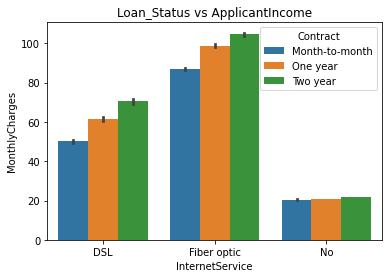

In [16]:
sns.barplot(x="InternetService", y="MonthlyCharges", hue="Contract", data=df1)
plt.title("Loan_Status vs ApplicantIncome")
plt.show()

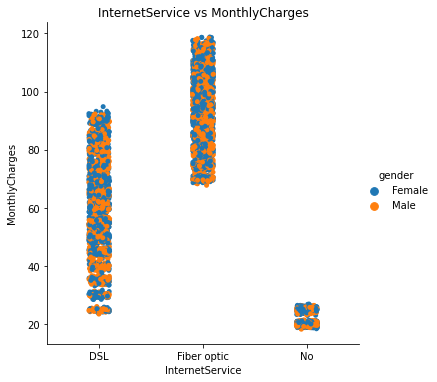

In [17]:
sns.catplot(x="InternetService", y="MonthlyCharges",hue='gender',data=df1)
plt.title("InternetService vs MonthlyCharges")
plt.show()

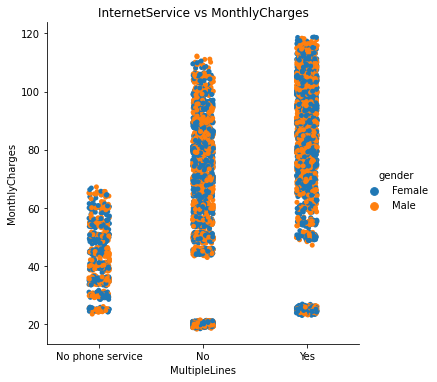

In [18]:
sns.catplot(x="MultipleLines", y="MonthlyCharges",hue='gender',data=df1)
plt.title("InternetService vs MonthlyCharges")
plt.show()

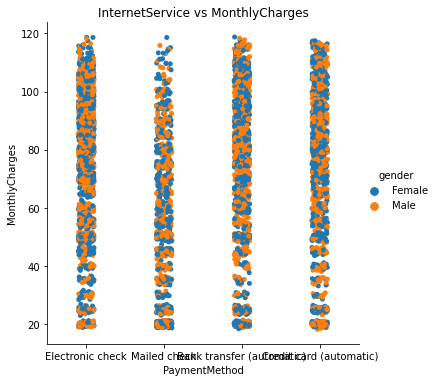

In [19]:
sns.catplot(x="PaymentMethod", y="MonthlyCharges",hue='gender',data=df1)
plt.title("InternetService vs MonthlyCharges")
plt.show()

In [20]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
    df1

In [22]:
df1.describe(include='all')

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,683.524776,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370
std,0.368612,24.559481,478.511521,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,199.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,722.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,0.000000,55.000000,1090.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,72.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [23]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
SeniorCitizen,1.000000,0.016567,0.219524,-0.001874,0.016479,-0.211185,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.150889
tenure,0.016567,1.000000,0.268133,0.005106,0.379697,0.159712,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,-0.352229
MonthlyCharges,0.219524,0.268133,1.000000,-0.014623,0.106501,-0.107507,0.271209,0.444580,-0.244965,-0.044692,0.141258,0.189949,0.006412,0.377224,0.375323,-0.050595,0.344417,-0.193822,0.183523
gender,-0.001874,0.005106,-0.014623,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.008612
Partner,0.016479,0.379697,0.106501,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,-0.150448
Dependents,-0.211185,0.159712,-0.107507,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.164221
PhoneService,0.008576,0.008448,0.271209,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.011942
MultipleLines,0.146185,0.343032,0.444580,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.038037
InternetService,-0.032310,-0.030359,-0.244965,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.047291
OnlineSecurity,-0.128221,0.325468,-0.044692,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.289309


<AxesSubplot:>

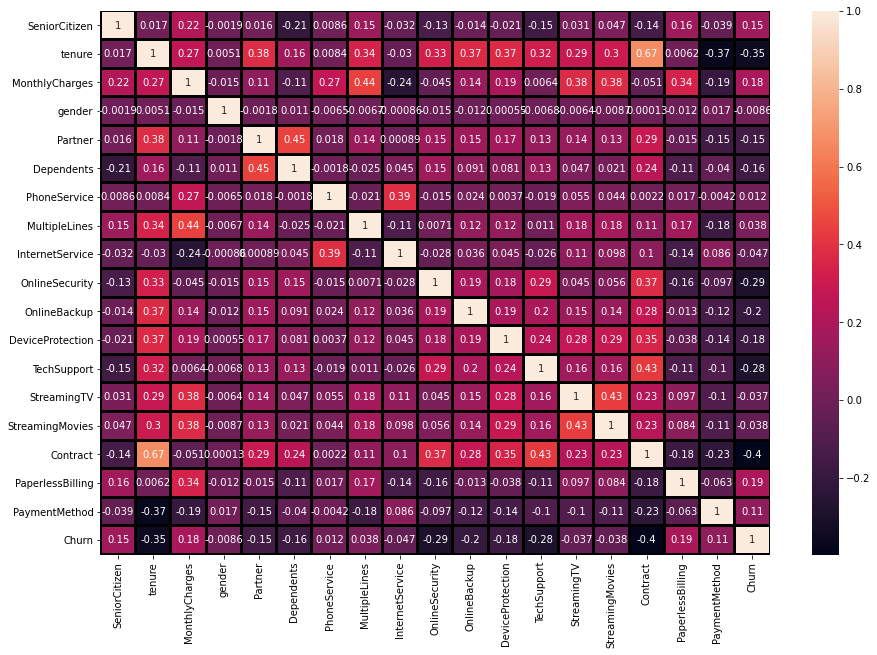

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,linewidth=2.0,linecolor='black')

Observation:
    
1.Streaming movies and Streaming Tv are havingmulti collinearity.

2.chrun having netive correlation in contract and all less corelation.

3.drop the monthly charges,as already tootal charges are there.

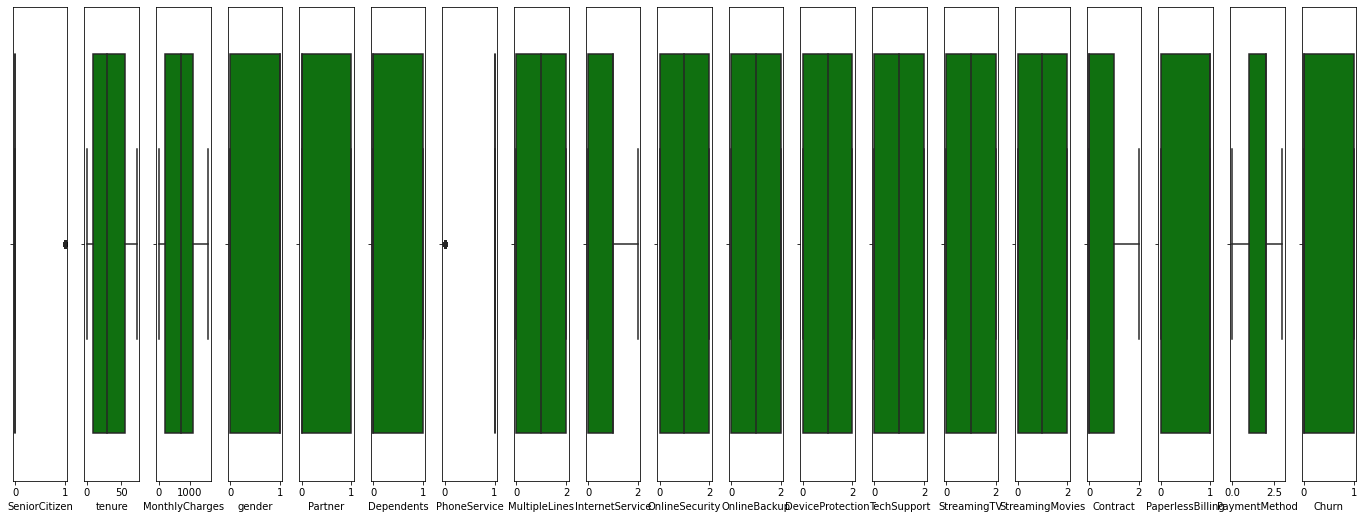

In [26]:
collist=df1.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [27]:
from scipy.stats import zscore
import numpy as np

In [28]:
z=np.abs(zscore(df1))
z

array([[0.43991649, 1.27744458, 1.13176632, ..., 0.8297975 , 0.39855772,
        0.60102348],
       [0.43991649, 0.06632742, 0.38773977, ..., 1.20511329, 1.33486261,
        0.60102348],
       [0.43991649, 1.23672422, 0.51731743, ..., 0.8297975 , 1.33486261,
        1.66382851],
       ...,
       [0.43991649, 0.87024095, 1.14221613, ..., 0.8297975 , 0.39855772,
        0.60102348],
       [2.27315869, 1.15528349, 0.23297901, ..., 0.8297975 , 1.33486261,
        1.66382851],
       [0.43991649, 1.36937906, 1.4723266 , ..., 0.8297975 , 1.47405205,
        0.60102348]])

In [29]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [30]:
df_new=df1[(z<3) .all(axis=1)]
df_new

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
1,0,34,498,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,436,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
4,0,2,729,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
5,0,8,1274,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1
6,0,22,1075,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,52,0,0,0,1,0,2,1,1,1,1,1,1,2,1,0,0
7038,0,24,991,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,1340,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7041,1,4,795,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [31]:
print(df1.shape)
print(df_new.shape)

(7043, 19)
(6361, 19)


In [32]:
loss_percent=(7043-6361)/7043*100
print(loss_percent)

9.683373562402386


In [33]:
x=df_new.drop('Churn',axis=1)
y=df_new['Churn']

In [34]:
x

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1,0,34,498,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,436,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
4,0,2,729,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
5,0,8,1274,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2
6,0,22,1075,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,52,0,0,0,1,0,2,1,1,1,1,1,1,2,1,0
7038,0,24,991,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,1340,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7041,1,4,795,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [35]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [36]:
df_new.skew()

SeniorCitizen       1.823376
tenure              0.237945
MonthlyCharges     -0.166854
gender             -0.014781
Partner             0.056316
Dependents          0.876594
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
Churn               1.053055
dtype: float64

Observation:
    

Contract,Dependents,SeniorCitizen are highly skewness.

<AxesSubplot:xlabel='Contract', ylabel='Density'>

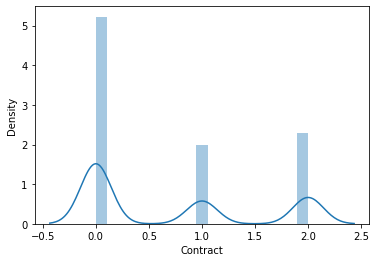

In [37]:
sns.distplot(df_new['Contract'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

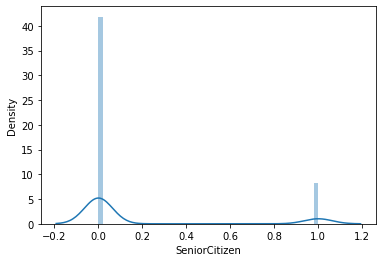

In [38]:
sns.distplot(df_new['SeniorCitizen'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

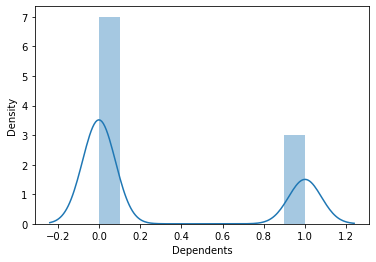

In [39]:
sns.distplot(df_new['Dependents'])

In [40]:
y.value_counts()

0    4662
1    1699
Name: Churn, dtype: int64

In [41]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [42]:
x

array([[-0.44159123,  0.29435814, -0.27526943, ...,  0.78943577,
        -1.21176486,  1.31916733],
       [-0.44159123, -1.49687342, -0.40486792, ..., -0.88872243,
         0.82524261,  1.31916733],
       [-0.44159123, -1.49687342,  0.16400585, ..., -0.88872243,
         0.82524261,  0.41100623],
       ...,
       [-0.44159123,  1.33961545,  1.13280591, ...,  0.78943577,
         0.82524261, -0.52011602],
       [ 2.26453771, -1.2669445 ,  0.27987173, ..., -0.88872243,
         0.82524261,  1.31916733],
       [-0.44159123,  1.19924554,  1.2012769 , ...,  1.3437217 ,
         0.82524261, -1.48777569]])

In [43]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.        , 0.6717516 , 0.47080257, ..., 0.75171342, 0.        ,
        1.        ],
       [0.        , 0.10924044, 0.43156323, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.10924044, 0.60380465, ..., 0.        , 1.        ,
        0.67645902],
       ...,
       [0.        , 1.        , 0.89713421, ..., 0.75171342, 1.        ,
        0.34473791],
       [1.        , 0.18144639, 0.63888608, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.9559188 , 0.9178656 , ..., 1.        , 1.        ,
        0.        ]])

In [44]:
print(x.shape)
print(y.shape)

(6361, 18)
(6361,)


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5088, 18)
(5088,)
(1273, 18)
(1273,)


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [49]:
x_train

array([[0.        , 0.6717516 , 0.05556239, ..., 0.75171342, 0.        ,
        0.34473791],
       [0.        , 0.86067579, 0.08113121, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.5273534 , 0.65551984, ..., 0.75171342, 1.        ,
        0.34473791],
       ...,
       [1.        , 0.43539551, 0.84222628, ..., 0.        , 1.        ,
        0.67645902],
       [0.        , 0.49395259, 0.44970955, ..., 0.39155828, 0.52088771,
        0.65868203],
       [0.        , 0.09199836, 0.04963343, ..., 0.        , 1.        ,
        0.97821128]])

In [50]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
7453    1
7454    1
7455    1
7456    1
7457    1
Name: Churn, Length: 7458, dtype: int32

In [51]:
y_train.value_counts()

1    3729
0    3729
Name: Churn, dtype: int64

In [52]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [53]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.7821131670689193


In [54]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [0 0 0 ... 0 0 0]
actual score: 5230    0
5321    0
527     0
2987    0
1027    0
       ..
5747    0
5491    0
5623    0
6638    0
5205    0
Name: Churn, Length: 1273, dtype: int32


In [55]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('F1 score',f1_score(y_test,pred,average='micro'))

Accuracy_score: 0.7706205813040062
[[703 230]
 [ 62 278]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       933
           1       0.55      0.82      0.66       340

    accuracy                           0.77      1273
   macro avg       0.73      0.79      0.74      1273
weighted avg       0.82      0.77      0.78      1273

F1 score 0.7706205813040062


# Hyper Tuning Of Logistic Classifier

In [58]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.7799659931266529


In [59]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [61]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print(f.score(x_train,y_train))
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [62]:
fun(svc)

0.8395012067578439
Accuracy:: 0.7666928515318147
confusion matrix
 [[720 213]
 [ 84 256]]
classification report
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       933
           1       0.55      0.75      0.63       340

    accuracy                           0.77      1273
   macro avg       0.72      0.76      0.73      1273
weighted avg       0.80      0.77      0.78      1273

F1 score 0.7666928515318147


F1 score 0.7651217596229379

In [63]:
fun(dtc)

0.9978546527219093
Accuracy:: 0.7391987431264729
confusion matrix
 [[731 202]
 [130 210]]
classification report
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       933
           1       0.51      0.62      0.56       340

    accuracy                           0.74      1273
   macro avg       0.68      0.70      0.69      1273
weighted avg       0.76      0.74      0.75      1273

F1 score 0.7391987431264729


In [64]:
fun(knn)

0.8563958165728077
Accuracy:: 0.6991358994501178
confusion matrix
 [[636 297]
 [ 86 254]]
classification report
               precision    recall  f1-score   support

           0       0.88      0.68      0.77       933
           1       0.46      0.75      0.57       340

    accuracy                           0.70      1273
   macro avg       0.67      0.71      0.67      1273
weighted avg       0.77      0.70      0.72      1273

F1 score 0.6991358994501178


F1 score 0.6920659858601729

In [65]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
0.7354181179504662


In [66]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'linear'}
SVC(kernel='linear')
0.8023895915405349


In [67]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[7,5,11],"weights":['uniform','distance'],"algorithm":['auto', 'brute']}
grid_search_cv = GridSearchCV(knn,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=11)
0.7637151877158398


In [68]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [69]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [70]:
fun(ad)

0.8169750603378922
Accuracy:: 0.7784760408483896
confusion matrix
 [[724 209]
 [ 73 267]]
classification report
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       933
           1       0.56      0.79      0.65       340

    accuracy                           0.78      1273
   macro avg       0.73      0.78      0.75      1273
weighted avg       0.82      0.78      0.79      1273

F1 score 0.7784760408483896


F1 score 0.7651217596229379

In [71]:
fun(rf)

0.9978546527219093
Accuracy:: 0.7902592301649647
confusion matrix
 [[790 143]
 [124 216]]
classification report
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       933
           1       0.60      0.64      0.62       340

    accuracy                           0.79      1273
   macro avg       0.73      0.74      0.74      1273
weighted avg       0.79      0.79      0.79      1273

F1 score 0.7902592301649646


F1 score 0.788688138256088

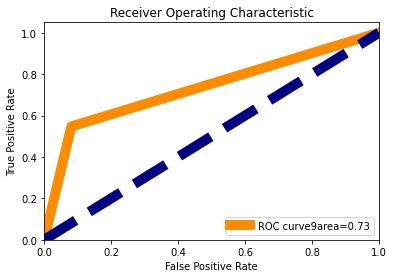

In [72]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve9area=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [74]:
for i in range(2,10):
    score=cross_val_score(lm,x,y,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.8039611174050327
At Value of 3 0.8071061620986897
At Value of 4 0.8056904205653658
At Value of 5 0.8045897622117814
At Value of 6 0.8060049259331711
At Value of 7 0.8066342033825787
At Value of 8 0.8058480294554533
At Value of 9 0.8063205349268233


In [75]:
score=cross_val_score(lm,x,y,cv=10)
score.mean()

0.8060061905749238

In [76]:
score=cross_val_score(dtc,x,y,cv=10)
score.mean()

0.7330615700561791

In [77]:
score=cross_val_score(svc,x,y,cv=10)
score.mean()

0.798773733005539

In [78]:
score=cross_val_score(rf,x,y,cv=10)
score.mean()

0.7899696888915217

In [79]:
score=cross_val_score(ad,x,y,cv=10)
score.mean()

0.8000315946407591

Observation:
    
As per the model the accuracy scores,cross validation score and f1 score random forest is giving good results.

# Saving Model

In [80]:
import pickle
filename="loan_application.pkl"
pickle.dump(rf,open(filename,'wb'))

In [81]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ad.predict(x_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [82]:
df_com

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1268,0,0
1269,0,0
1270,0,0
1271,0,0
